# homework 2 interpolation sls 3.8
author: k.wodehouse

In [6]:
import numpy as np
from scipy.optimize import fsolve
import pandas as pd

temps = np.array([350,400])
h_hat = np.array([3167.7,3271.9])

H = np.interp(370, temps, h_hat)
H

3209.38

In [7]:
data = {
    'T': [200, 250, 300, 350, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300],
    'V': [0.4249, 0.4744, 0.5226, 0.5701, 0.6173, 0.7109, 0.8041, 0.8969, 0.9896, 1.0822, 1.1747, 1.2672, 1.3596, 1.4521],
    'U': [2642.9, 2723.5, 2802.9, 2882.6, 2963.2, 3128.4, 3299.6, 3477.5, 3662.1, 3853.6, 4051.8, 4256.3, 4466.8, 4682.5],
    'H': [2855.4, 2960.7, 3064.2, 3167.7, 3271.9, 3483.9, 3701.7, 3925.9, 4156.9, 4394.7, 4639.1, 4889.9, 5146.6, 5408.6],
    'S': [7.0592, 7.2709, 7.4599, 7.6329, 7.7938, 8.0873, 8.3522, 8.5952, 8.8211, 9.0329, 9.2328, 9.4224, 9.6029, 9.7749]
}

df = pd.DataFrame(data).set_index('T')
df

,V,U,H,S
T,,,,
200,0.4249,2642.9,2855.4,7.0592
250,0.4744,2723.5,2960.7,7.2709
300,0.5226,2802.9,3064.2,7.4599
350,0.5701,2882.6,3167.7,7.6329
400,0.6173,2963.2,3271.9,7.7938
500,0.7109,3128.4,3483.9,8.0873
600,0.8041,3299.6,3701.7,8.3522
700,0.8969,3477.5,3925.9,8.5952
800,0.9896,3662.1,4156.9,8.8211


In [8]:
def sls38(T):
    U = np.interp(T, df.index, df['U'])
    V = np.interp(T, df.index, df['V'])

    return ((3209.38 - U) / V) + (0.516422*2582.8 - 0.516422*3209.38)

T = fsolve(sls38, 200)[0]
print(f'calc temp: {T:.3f}')

V = np.interp(T, df.index, df['V'])
print(f'calc V_hat: {V:.5f}')

print(f'calc m: {1/V:.3f}')

calc temp: 423.753
calc V_hat: 0.63953
calc m: 1.564


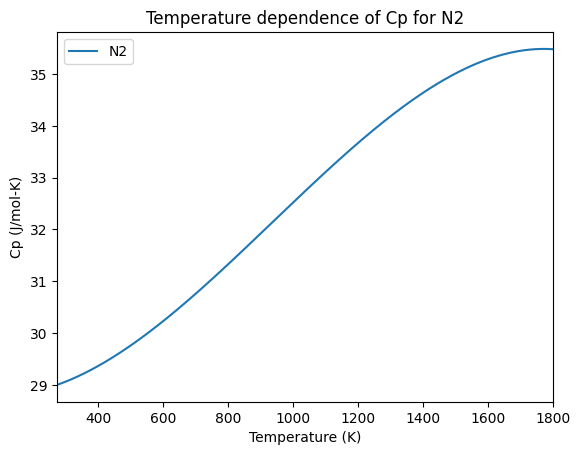

In [12]:
import matplotlib.pyplot as plt

def cpN2(T):
    return 28.883 - 0.157e-2*T + 0.808e-5*T**2 - 2.873e-9*T**3

temps = np.arange(273,1800)
cpsN2 = cpN2(temps)

plt.plot(temps, cpsN2, label='N2')
plt.xlim(273,1800)

plt.xlabel('Temperature (K)')
plt.ylabel('Cp (J/mol-K)')
plt.title('Temperature dependence of Cp for N2')
plt.legend()